In [1]:
import glob
import os

import tensorflow as tf
from tensorflow.core.util import event_pb2
from matplotlib import pyplot as plt
import numpy as np

2024-11-16 18:25:29.340823: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 18:25:29.347472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-16 18:25:29.355273: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-16 18:25:29.357680: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-16 18:25:29.364029: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def get_section_results(file):
    """
    Extracts training environment steps and average return from TensorBoard summary files.

    Args:
        file (str): Path to the TensorBoard summary file.

    Returns:
        tuple: Two lists containing environment steps and average returns.
    """
    X = []
    Y = []
    std = []

    # Create a TFRecordDataset to read the event file
    dataset = tf.data.TFRecordDataset(file)

    for raw_record in dataset:
        event = event_pb2.Event.FromString(raw_record.numpy())
        for value in event.summary.value:
            if value.tag == "Train_EnvstepsSoFar" and value.HasField("simple_value"):
                X.append(value.simple_value)
            elif value.tag == "Eval_AverageReturn" and value.HasField("simple_value"):
                Y.append(value.simple_value)
            elif value.tag == "Eval_StdReturn" and value.HasField("simple_value"):
                std.append(value.simple_value)

        # Break if we have more than 120 entries in X
        if len(X) > 120:
            break

    return X, Y, std

In [3]:
event_files = {}

event_files["Random Shooting"] = {}
event_files["Random Shooting"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/hw4_q5_cheetah_random*/events*")
)[0]

event_files["CEM 2"] = {}
event_files["CEM 2"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/hw4_q5_cheetah_cem_2*/events*")
)[0]

event_files["CEM 4"] = {}
event_files["CEM 4"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/hw4_q5_cheetah_cem_4*/events*")
)[0]

I0000 00:00:1731799530.488475  294927 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731799530.517264  294927 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731799530.520571  294927 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731799530.524063  294927 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

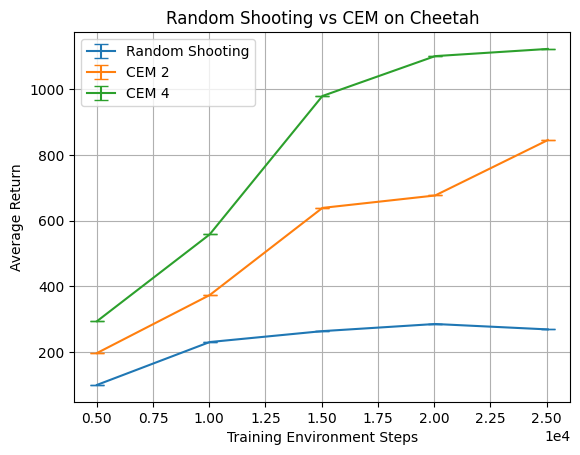

In [4]:
for name, entry in event_files.items():
    entry["X"], entry["Y"], entry["std"] = get_section_results(entry["event_file"])
    plt.errorbar(entry["X"], entry["Y"], yerr=entry["std"], label=name, capsize=5)

plt.xlabel("Training Environment Steps")
plt.ylabel("Average Return")
plt.title("Random Shooting vs CEM on Cheetah")
plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
plt.legend()
plt.grid()
plt.savefig("figs/P5.pdf", transparent=True)
plt.show()